In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [23]:
df = pd.read_csv("data/data2020.csv", sep=";", decimal=",")

In [24]:
df.head(18)

,Kabupaten,jumlah_penduduk,total_sampah_ton,jumlah_truk,jumlah_motor,jumlah_tps,total_armada,sampah_perpenduduk,sampah_perarmada,sampah_pertps
0,bogor,5409.37,2173.05,11,265,167,276,0.000357,7.873370,13.012275
1,sukabumi,2718.74,734.32,13,13,175,26,0.000297,28.243077,4.196114
2,cianjur,2470.56,692.72,2,20,196,22,0.000306,31.487273,3.534286
3,bandung,3616.54,661.72,37,18,194,55,0.000173,12.031273,3.410928
4,garut,2577.35,794.22,11,31,145,42,0.000301,18.910000,5.477379
5,tasikmalaya,1861.06,482.74,2,39,81,41,0.000275,11.774146,5.959753
6,ciamis,1226.05,411.47,9,24,80,33,0.000342,12.468788,5.143375
7,kuningan,1162.59,394.49,6,10,191,16,0.000363,24.655625,2.065393
8,cirebon,2270.35,765.32,19,13,283,32,0.000346,23.916250,2.704311
9,majalengka,1301.57,310.9,7,17,175,24,0.000257,12.954167,1.776571


In [25]:
df.isna().sum()

Kabupaten             0
jumlah_penduduk       0
total_sampah_ton      0
jumlah_truk           0
jumlah_motor          0
jumlah_tps            0
total_armada          0
sampah_perpenduduk    0
sampah_perarmada      0
sampah_pertps         0
dtype: int64

In [26]:
df = df.dropna()

In [27]:
df = df.replace(",", ".", regex=True)
df.columns = df.columns.str.strip().str.lower()

for col in df.columns:
    if col != 'kabupaten':
        df[col] = pd.to_numeric(df[col], errors='coerce')


df = df.dropna()

In [28]:
features = [
    'jumlah_penduduk',
    'total_sampah_ton',
    'jumlah_truk',
    'jumlah_motor',
    'jumlah_tps',
    'total_armada',
    'sampah_perpenduduk',
    'sampah_perarmada',
    'sampah_pertps'
]


In [29]:
X = df[features]

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df['PC1'] = X_pca[:, 0]
df['PC2'] = X_pca[:, 1]

In [32]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
cluster = kmeans.fit_predict(X_pca)

df["cluster"] = cluster

In [33]:
df_cluster = df[
    ["kabupaten", "PC1", "PC2", "cluster"]
].sort_values("cluster")

In [34]:
df_cluster.head(18)

,kabupaten,PC1,PC2,cluster
1,sukabumi,-0.503202,-0.348102,0
2,cianjur,-0.907289,-0.206415,0
5,tasikmalaya,-0.423846,-0.084147,0
4,garut,0.032111,-0.244031,0
6,ciamis,-0.914972,0.400943,0
7,kuningan,-1.768343,-0.037255,0
9,majalengka,-1.422357,-1.308264,0
8,cirebon,-0.564722,-1.000373,0
12,subang,-0.094135,1.274642,0
13,purwakarta,-1.384051,0.103157,0


In [35]:
pca.explained_variance_ratio_

array([0.50256389, 0.17707669])

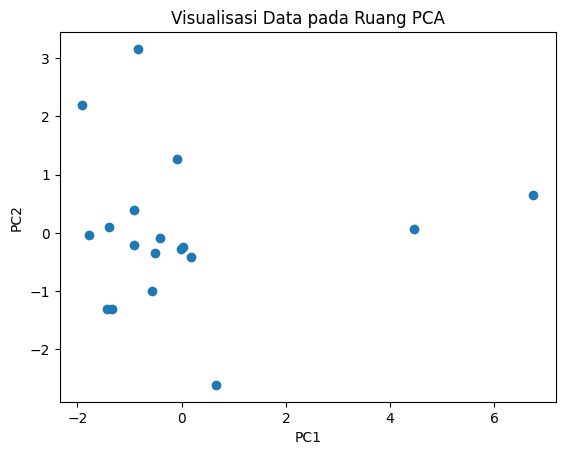

In [36]:
plt.scatter(df['PC1'], df['PC2'])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Visualisasi Data pada Ruang PCA")
plt.show()

In [38]:
pickle.dump(kmeans, open("model2020/kmeans_2020.pkl", "wb"))
pickle.dump(scaler, open("model2020/scaler_2020.pkl", "wb"))
pickle.dump(pca, open("model2020/pca_2020.pkl", "wb"))